In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
final_df = pd.read_csv("data/final_df.csv")

In [4]:
crime = pd.read_csv("data/crime.csv")

C:\Users\jaiti\AppData\Local\Temp\ipykernel_28020\2056651422.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv("data/crime.csv")


In [5]:
final_df

,indicator_id,region_id,date,value,city,state,city_state,indicator,category,total_incidents
0,ZATT,52334,2014-01-31,173491.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
1,ZATT,52334,2014-02-28,174812.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
2,ZATT,52334,2014-03-31,177605.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
3,ZATT,52334,2014-04-30,178458.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
4,ZATT,52334,2014-05-31,178872.0,Greenwood,SC,"Greenwood, SC",ZHVI All Homes- Top Tier Time Series ($),Home values,150
...,...,...,...,...,...,...,...,...,...,...
284551,Z4BR,92159,2014-08-31,83411.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190
284552,Z4BR,92159,2014-09-30,83676.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190
284553,Z4BR,92159,2014-10-31,84146.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190
284554,Z4BR,92159,2014-11-30,84545.0,Victoria,TX,"Victoria, TX",ZHVI 4-Bedroom Time Series ($),Home values,190


In [8]:
final_df.indicator.unique()

array(['ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)', 'ZHVI 3-Bedroom Time Series ($)',
       'ZHVI 1-Bedroom Time Series ($)', 'ZHVI 4-Bedroom Time Series ($)',
       'ZORI (Smoothed): All Homes Plus Multifamily Time Series ($)',
       'ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series ($)'],
      dtype=object)

In [ ]:
city_state = final_df[["city_state","value","total_incidents"]].groupby("city_state").agg("mean").reset_index()

In [ ]:
city_state_25 = city_state.nlargest(25, "total_incidents")
city_state_bot_25 = city_state.nsmallest(25, "total_incidents")


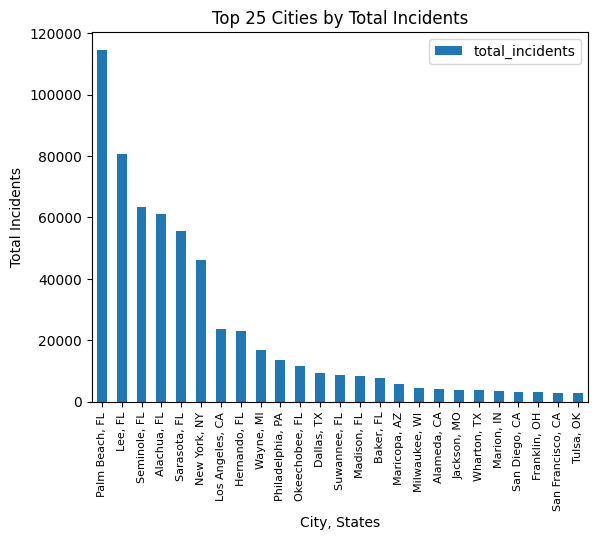

In [ ]:
ax = city_state_25.plot(kind='bar', x='city_state', y='total_incidents')
plt.title('Top 25 Cities by Total Incidents')
plt.xlabel('City, States')
plt.ylabel('Total Incidents')
ax.tick_params(axis='x', labelsize=8)
plt.show()

In [ ]:
city_state

,city_state,value,total_incidents
0,"Abbeville, SC",114940.932462,49.0
1,"Adair, IA",99129.192583,2.0
2,"Adair, OK",128714.437004,52.0
3,"Adams, NE",174836.911762,16.0
4,"Adams, WI",80529.794338,15.0
...,...,...,...
881,"York, PA",125759.670236,303.0
882,"York, SC",176969.457233,262.0
883,"Yuma, AZ",144997.564933,171.0
884,"Yuma, CO",126575.738057,4.0


Text(0.5, 1.0, 'Total_Incidents Box Plot')

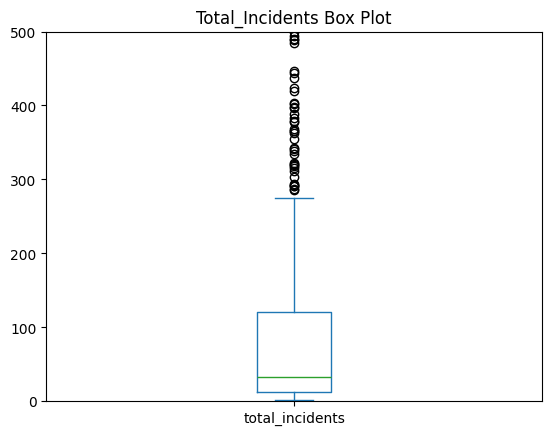

In [ ]:
city_state["total_incidents"].plot(kind="box")
plt.ylim(0, 500)
plt.title("Total_Incidents Box Plot")